https://keras.io/api/datasets/fashion_mnist/


In [14]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

# example of loading the fashion mnist dataset
from matplotlib import pyplot

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Model
from keras.layers.core import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Input
from sklearn import metrics as me
from scipy import stats

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Load the dataset
from keras.datasets import fashion_mnist
# load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


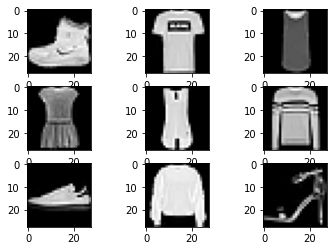

In [24]:
# source: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()



In [25]:
def build_grid_of_images(array):
    assert len(array.shape) == 3
    dim_0 = np.sqrt(array.shape[0])
    assert dim_0.is_integer()
    
    temp_out = np.reshape(array, (dim_0, dim_0, array.shape[1], array.shape[2]))
    temp_out = np.rollaxis(temp_out, 1, 3)
    return np.reshape(temp_out, (dim_0*array.shape[1], dim_0*array.shape[2]))

def plot_conv_layer_output(temp_out, title):
    temp_to_plot = build_grid_of_images(temp_out)
    pl.imshow(temp_to_plot, interpolation='nearest', cmap=pl.get_cmap('Greys'))
    ax = pl.gca()
    ax.set_xticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[1]))    
    ax.set_yticks(np.arange(-0.5, temp_to_plot.shape[0]+0.5, temp_out.shape[2]))
    pl.grid()
    pl.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off', labelbottom='off', labelleft='off')
    pl.title(title)

def plot_dense_layer_output(temp_out, title):
    pl.bar(np.arange(temp_out.shape[1])-0.4, temp_out[0,:])
    pl.xlim(-0.5, temp_out.shape[1])
    pl.grid()
    pl.title(title)

In [26]:
n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = X_train.reshape(n_train, height, width, 1).astype('float32')
X_test = X_test.reshape(n_test, height, width, 1).astype('float32')

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


# CNN

In [41]:
l0 = Input(shape=(height, width, 1), name='l0')

l1 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = Conv2D(9, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = Conv2D(16, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = Flatten(name='flat')(l3_mp)

l4 = Dense(25, activation='relu', name='l4')(flat)

l5 = Dense(n_classes, activation='softmax', name='l5')(l4)

model = Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 l0 (InputLayer)             [(None, 28, 28, 1)]       0         
                                                                 
 l1 (Conv2D)                 (None, 28, 28, 9)         234       
                                                                 
 l1_mp (MaxPooling2D)        (None, 14, 14, 9)         0         
                                                                 
 l2 (Conv2D)                 (None, 14, 14, 9)         2034      
                                                                 
 l2_mp (MaxPooling2D)        (None, 7, 7, 9)           0         
                                                                 
 l3 (Conv2D)                 (None, 7, 7, 16)          1312      
                                                                 
 l3_mp (MaxPooling2D)        (None, 3, 3, 16)          0   

In [42]:
batch_size = 16382
n_epoch = 100

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
4/4 [==============================] - 11s 3s/step - loss: 2.2814 - accuracy: 0.1562 - val_loss: 2.2407 - val_accuracy: 0.1775
Epoch 2/100
4/4 [==============================] - 12s 3s/step - loss: 2.2100 - accuracy: 0.2782 - val_loss: 2.1304 - val_accuracy: 0.4076
Epoch 3/100
4/4 [==============================] - 13s 3s/step - loss: 2.0787 - accuracy: 0.4208 - val_loss: 1.9733 - val_accuracy: 0.4219
Epoch 4/100
4/4 [==============================] - 13s 3s/step - loss: 1.9104 - accuracy: 0.4450 - val_loss: 1.7903 - val_accuracy: 0.4465
Epoch 5/100
4/4 [==============================] - 13s 3s/step - loss: 1.7298 - accuracy: 0.4669 - val_loss: 1.6131 - val_accuracy: 0.4795
Epoch 6/100
4/4 [==============================] - 14s 3s/step - loss: 1.5620 - accuracy: 0.4924 - val_loss: 1.4684 - val_accuracy: 0.5147
Epoch 7/100
4/4 [==============================] - 15s 4s/step - loss: 1.4496 - accuracy: 0.5013 - val_loss: 1.3528 - val_accuracy: 0.5475
Epoch 8/100
4/4 [==========

4/4 [==============================] - 15s 4s/step - loss: 0.6103 - accuracy: 0.7674 - val_loss: 0.6142 - val_accuracy: 0.7705
Epoch 60/100
4/4 [==============================] - 15s 4s/step - loss: 0.6108 - accuracy: 0.7697 - val_loss: 0.6492 - val_accuracy: 0.7554
Epoch 61/100
4/4 [==============================] - 15s 4s/step - loss: 0.6157 - accuracy: 0.7725 - val_loss: 0.6077 - val_accuracy: 0.7774
Epoch 62/100
4/4 [==============================] - 15s 4s/step - loss: 0.6065 - accuracy: 0.7788 - val_loss: 0.6092 - val_accuracy: 0.7692
Epoch 63/100
4/4 [==============================] - 14s 3s/step - loss: 0.5904 - accuracy: 0.7826 - val_loss: 0.6296 - val_accuracy: 0.7684
Epoch 64/100
4/4 [==============================] - 16s 4s/step - loss: 0.6144 - accuracy: 0.7781 - val_loss: 0.5938 - val_accuracy: 0.7789
Epoch 65/100
4/4 [==============================] - 14s 3s/step - loss: 0.5815 - accuracy: 0.7853 - val_loss: 0.6332 - val_accuracy: 0.7661
Epoch 66/100
4/4 [===============

Test score: 0.5433769822120667
Test accuracy: 0.7975999712944031


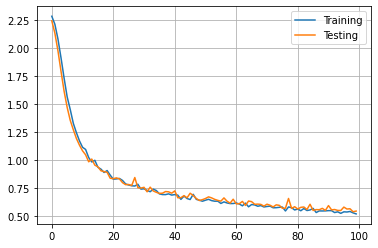

In [43]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [44]:
pred = model.predict_on_batch(X_test)
pred = np.argmax(pred, axis=-1)
cm = me.confusion_matrix(y_test, pred)

In [45]:
def display_conf_matrix(conf_matrix, classes_labels=['0', '1', '2', '3', '4','5','6','7','8','9']):
    disp = me.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes_labels)
    fig, ax = pl.subplots(figsize=(10,10))
    disp.plot(ax=ax)

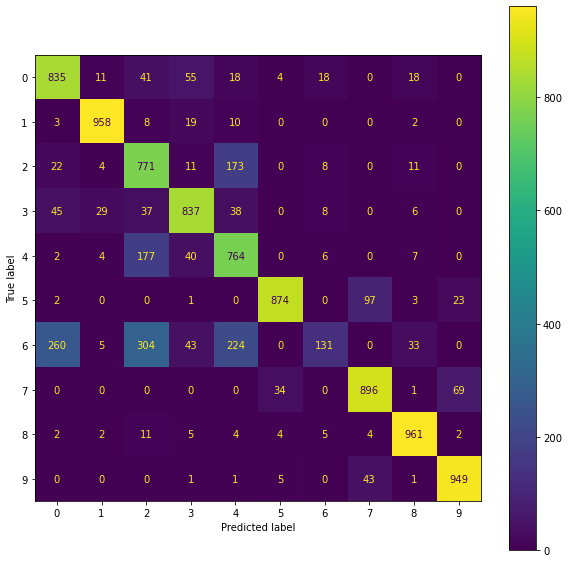

In [46]:
display_conf_matrix(cm, classes_labels=['0', '1', '2', '3', '4','5','6','7','8','9'])